# Lojistik Regresyon

Bu çalışmada bir hava yolu şirketine danışmanlık hizmeti veriyoruz.

Hava yolu şirketi, uçak içi eğlence deneyiminin müşteri memnuniyetini artırıp artırmadığını öğrenmek istiyor. Şirket, geçmiş müşteri geri bildirimlerine dayanarak gelecekteki bir müşterinin sunulan hizmetlerden memnun kalıp kalmayacağını tahmin edebilecek bir modelin oluşturulmasını ve değerlendirilmesini talep ediyor.

Bu çalışmada kullanılan veri seti, 129.880 müşteriden oluşan bir örneklemi kapsamaktadır. Veri seti; uçuş sınıfı, uçuş mesafesi ve uçak içi eğlence gibi çeşitli değişkenleri içermektedir. Bu bağlamda amacımız, hava yolu şirketinin bu verileri daha iyi anlamasına ve modellemesine yardımcı olmak için ikili (binomial) lojistik regresyon modelinden faydalanmaktır.

Çalışmada sektöre ait bir veri seti kullanıldığından, modelleme sürecine geçmeden önce temel düzeyde Keşifsel Veri Analizi (EDA), veri temizleme ve çeşitli veri dönüşüm işlemleri yapılması gerekmektedir.


## Kütüphanelerin Dahil Edilmesi

In [14]:
# Temel çalışma paketlerinin dahili.
import numpy as np
import pandas as pd
from IPython.display import display

# Veri ön işleme, modelleme ve değerlendirme için paketlerin dahili.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Görselleştirme paketlerinin dahili.
import matplotlib.pyplot as plt
import seaborn as sns

### Verinin Yüklenmesi

In [15]:
df_original = pd.read_csv("Invistico_Airline.csv")

### İlk 10 satırın görüntülenmesi

In [16]:
display(df_original.head(n = 10))

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Veri Keşfi, Veri Temizliği ve Model Hazırlık İşlemleri 

### Verinin Hazırlanması

Veriyi lojistik regresyon için hazır hale getirmemiz gerekiyor. Bunu yaparken izleyeceğimiz adımlar:

*   Veri Keşfi
*   Eksik Değer Analizi
*   Veri Dönüşümü
*   Kolon İsimlerinin Değiştirilmesi
*   Eğitim ve Test verisinin oluşturulması

### Verinin Keşfi

Her bir verinin tipini inceliyoruz:

In [17]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Memnun kalan müşterilerin oranının kontrolü

Modelleme aşamasından önce memnun olan müşterilerin oranını görüntülüyoruz:

In [18]:
df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

Veride 71.087 memnun müşteri ve 58.793 memnun olmayan müşteri mevcut.
Bu veri, lojistik regresyon modelinin doğruluğunu incelememiz için yararlı olacaktır.

### Eksik Veri Kontrolü

In [19]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Bu çalışmada hava yolu şirketi özellikle, daha iyi bir uçak içi eğlence deneyiminin müşteri memnuniyetini artırıp artırmadığını öğrenmek istemektedir.

Arrival Delay in Minutes (Varış Gecikmesi Dakika Cinsinden) sütunu ikili lojistik regresyon modeline dahil edilmeyecektir; ancak bu sütun gelecekte şirketin ilgisini çekebilir.

Şimdilik, eksik değerler şu iki nedenden ötürü veri setinden çıkarılmalıdır:

- Toplam 129.880 gözlem içerisinde yalnızca 393 eksik değer bulunmaktadır; bu sayı toplamın çok küçük bir yüzdesini oluşturmaktadır.

- ! Bu sütun, eğlence deneyimi ile memnuniyet arasındaki ilişkiyi etkileyebilir.


### Eksik değerlerin veriden çıkartılması

In [20]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

### Verinin Hazırlanması

#### Kategorik sütunun sayısal değere dönüştürülmesi

Memnuniyet sütununu kategorik formattan sayısal formata dönüştürmek için one-hot encoding ve kukla (dummy) değişken dönüşümü kullanıyoruz.


In [21]:
# getting categorical columns
categorical_cols = df_subset.select_dtypes(include=['object']).columns.tolist()

# displaying unique values for categorical columns
[f"{i}: {df_subset[i].unique().tolist()}" for i in categorical_cols]


df_subset['satisfaction'] = df_subset['satisfaction'].map({'dissatisfied': 0.0, 'satisfied': 1.0})
df_subset['Customer Type'] = df_subset['Customer Type'].map({'disloyal Customer': 0.0, 'Loyal Customer': 1.0})
df_subset['Type of Travel'] = df_subset['Type of Travel'].map({'Personal Travel': 0.0, 'Business travel': 1.0})
df_subset['Class'] = df_subset['Class'].map({'Eco': 0.0, 'Eco Plus': 1.0, 'Business': 2.0})


#### Verinin ilk 10 satırını görüntüleme

Uygulanan dönüşümlerin veri çerçevesi üzerindeki etkisini incelemek için `df_subset` değişkeninin ilk 10 satırını görüntülüyoruz.


In [22]:
display(df_subset.head(10))

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,65,0.0,0.0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,1.0,47,0.0,2.0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,1.0,15,0.0,0.0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,1.0,60,0.0,0.0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,1.0,70,0.0,0.0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,1.0,30,0.0,0.0,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,1.0,66,0.0,0.0,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,1.0,10,0.0,0.0,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,1.0,56,0.0,2.0,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,1.0,22,0.0,0.0,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


#### Eğitim ve test veri setlerinin oluşturulması

Verinin %70'ini eğitim seti olarak, kalan %30'unu ise test seti olarak ayırıyoruz.


In [23]:
X = df_subset.drop(columns=["satisfaction"])
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Verinin Ölçeklendirilmesi

### 📊 Makine Öğreniminde `StandardScaler` Kullanımının Sebebi

Veri setinin standartlaştırılması, birçok makine öğrenimi algoritması için yaygın bir gerekliliktir çünkü **çoğu model, özelliklerin standartlaştırılmış olmasını varsayar**, yani:

* **Ortalama (μ) ≈ 0**
* **Standart sapma (σ) ≈ 1**

varsayımları mevcuttur.
---

#### 🧠 İstatistiksel Dayanak

İstatistikte, bir `x` değişkenini standartlaştırırken, onu aşağıdaki formülle **z-skoru**na dönüştürürüz:

$$
z = \frac{x - \mu}{\sigma}
$$

Bu dönüşüm, tüm değişkenlerin **ortak bir ölçeğe** getirilmesini sağlar; böylece modellerde adil karşılaştırma ve dengeli etki mümkün olur. Standartlaştırma yapılmazsa:

* **Yüksek varyansa sahip özellikler** lojistik regresyon fonksiyonunda baskın olur.
* **SVM (RBF kernel)**, **KNN** veya **L1/L2 düzenlemeli Lojistik Regresyon** gibi modeller, özelliklerin etkisini **yanlış yorumlayabilir**.

---

#### ⚠️ Amaç Fonksiyonları Üzerindeki Etkisi

Birçok optimizasyon yöntemi (örneğin gradyan inişi), özelliklerin benzer ölçeklerde olmasına dayanır. Örneğin:

* SVM’deki **RBF kernel**, mesafe hesaplamalarında tüm özelliklerin eşit katkı sağladığı varsayılır.
* Doğrusal modellerdeki **L1 ve L2 düzenleyiciler**, büyük katsayıları cezalandırır; ancak bir özellik yüksek varyansa sahipse, model küçük ağırlıklarla bunu telafi etmeye çalışır ve bu öğrenmeyi bozar.

---

#### 🚨 Aykırı Değer Uyarısı

`StandardScaler`, **aykırı değerlere karşı hassastır**. Aykırı değerler varsa:

* Ortalama ve standart sapma hesapları sapabilir.
* Bazı özellikler **yanlış ölçeklendirilerek** model performansını olumsuz etkileyebilir.

🔍 Bu durumlarda aşağıdaki alternatifler tercih edilebilir:

* `RobustScaler` (medyan ve IQR kullanır)
* `MinMaxScaler` (veriyi sabit bir aralığa, örn. \[0, 1], ölçeklendirir)

In [24]:
# Verinin ölçeklendirilmesi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelin Kurulması

### 📈 Lojistik Regresyon: Formüller ve Varsayımlar

---

#### 1. Lojistik Regresyon Modeli

Lojistik regresyon, bağımlı değişkenin **ikili (binary)** olduğu sınıflandırma problemlerinde kullanılan bir algoritmadır. Model, hedef değişkenin olasılığını tahmin eder:

$$
P(Y=1 \mid X) = \pi(X)
$$

Burada $X = (x_1, x_2, \ldots, x_p)$ özellik vektörü olup, $\pi(X)$ şu şekilde tanımlanır:

$$
\pi(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p)}}
$$

Bu fonksiyon **sigmoid (lojistik) fonksiyon** olarak adlandırılır.

---

#### 2. Logit (Log-Odds) Dönüşümü

Modelin lineer kısmı log-odds (logit) formunda ifade edilir:

$$
\text{logit}(\pi(X)) = \log\left(\frac{\pi(X)}{1 - \pi(X)}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

Başka bir deyişle, bağımlı değişkenin log-odds’u, özelliklerin doğrusal bir fonksiyonudur.

---

#### 3. Parametre Tahmini

Parametreler $\beta = (\beta_0, \beta_1, \ldots, \beta_p)$ **maksimum olabilirlik tahmini (MLE)** yöntemiyle hesaplanır:

$$
\hat{\beta} = \arg\max_\beta \prod_{i=1}^n \pi(x_i)^{y_i} (1 - \pi(x_i))^{1 - y_i}
$$

Burada $n$ gözlem sayısı, $y_i \in \{0,1\}$ gerçek verileri ifade eder.

---

#### 4. Model Varsayımları

* **Bağımsızlık:** Gözlemler birbirinden bağımsızdır.
* **Doğrusallık:** Sonucun log-odds’u ile bağımsız değişkenler arasında doğrusal ilişki vardır.
* **Çoklu doğrusal bağlantı yokluğu:** Bağımsız değişkenler arasında yüksek korelasyon olmamalıdır.
* **Özellik ölçeklendirme:** Özelliklerin benzer ölçeklerde olması gerekir (özellikle bazı optimizasyon algoritmaları için).
* **Aykırı değerlere duyarlılık:** Aşırı aykırı değerler model performansını etkileyebilir.

---

#### 5. Değerlendirme Metrikleri

* **Doğruluk (Accuracy)**
* **Hassasiyet ve Duyarlılık (Precision ve Recall)**
* **ROC Eğrisi ve AUC**
* **Log-loss (Negatif log-olabilirlik)**

---

#### 6. Özet

| Özellik           | Açıklama                                        |
| ----------------- | ----------------------------------------------- |
| Model Türü        | İkili Sınıflandırma                             |
| Bağımlı Değişken  | İkili (0 veya 1)                                |
| Tahmin Yöntemi    | Maksimum Olabilirlik Tahmini (MLE)              |
| Model Fonksiyonu  | Sigmoid (Lojistik) Fonksiyonu                   |
| Varsayımlar       | Bağımsız gözlemler, doğrusal logit ilişkisi     |
| Parametre Tahmini | Yinelemeli optimizasyon (Newton-Raphson, LBFGS) |

---

**Kaynaklar:**

* Hosmer, D.W., Lemeshow, S., & Sturdivant, R.X. (2013). *Applied Logistic Regression*.
* James, G. ve ark. (2013). *An Introduction to Statistical Learning*.


### Lojistik Regresyon Modelini Veriye Uyarlama

In [25]:
clf = LogisticRegression().fit(X_train,y_train)

### Katsayı Tahminlerinin Eldesi

In [26]:
# Özellik isimleriyle katsayılarının ortak çıktısı
feature_names = X.columns
coefficients = clf.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
display(coef_df)

,Feature,Coefficient
10,Inflight entertainment,0.970899
0,Customer Type,0.718826
13,On-board service,0.413536
5,Seat comfort,0.393397
16,Checkin service,0.368680
2,Type of Travel,0.362096
12,Ease of Online booking,0.333427
3,Class,0.328959
14,Leg room service,0.302778
18,Online boarding,0.195017


Eğim katsayınının çıktısı:

In [27]:
intercept = clf.intercept_[0]
print(f"Intercept: {intercept}")

Intercept: 0.3483148435261102


## Bulgular ve Değerlendirme


### Test verisi için sonuçların tahmin edilmesi

In [28]:
y_pred = clf.predict(X_test)

### Test Sonuçlarının (`y_pred`) Yazdırılması

In [29]:
print(y_pred)

[1. 0. 0. ... 0. 0. 1.]


### `predict_proba` ve `predict` fonksiyonlarının çıktısı


In [30]:
clf.predict_proba(X_test)

array([[0.03950588, 0.96049412],
       [0.73153025, 0.26846975],
       [0.96533277, 0.03466723],
       ...,
       [0.96603895, 0.03396105],
       [0.60248518, 0.39751482],
       [0.13549333, 0.86450667]])

In [31]:
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 1.])

---

#### 🔍 Sınıflandırma Metrikleri ve Hata Matrisi

İkili (binary) sınıflandırma problemlerinde karışıklık matrisi şu şekilde temsil edilir:

|               | **Tahmin: 1**           | **Tahmin: 0**           |
| ------------- | ----------------------- | ----------------------- |
| **Gerçek: 1** | **TP** (Doğru Pozitif)  | **FN** (Yanlış Negatif) |
| **Gerçek: 0** | **FP** (Yanlış Pozitif) | **TN** (Doğru Negatif)  |

**Değerlendirme Metrikleri:**

* Doğruluk (Accuracy)
* Hassasiyet (Precision)
* Duyarlılık / Geri çağırma (Recall)
* F1 Skoru

Bu metrikler, Lojistik Regresyon gibi ikili sınıflandırma modelleri için en sık kullanılan değerlendirme ölçütleridir. **Hata matrisi** temel alınarak hesaplanırlar.


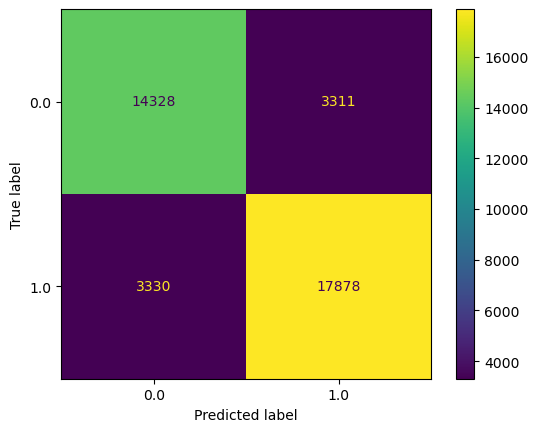

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

---

#### 🎯 Doğruluk (Accuracy)

**Tanım:** Doğru tahmin edilen gözlemlerin, toplam gözlem sayısına oranıdır.

$$
\text{Doğruluk} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [33]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.829047


---

## ✔️ Hassasiyet (Precision)

**Tanım:** Modelin pozitif sınıf olarak tahmin ettiklerinin ne kadarının gerçekten pozitif olduğunu gösterir. Yani, model 1 (pozitif) dediğinde ne kadar isabetli olduğunu ölçer.

$$
\text{Hassasiyet} = \frac{TP}{TP + FP}
$$

In [34]:
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))

Precision: 0.843740


---

#### 🔁 Duyarlılık (Recall) – Duyarlılık, Hassasiyet veya Doğru Pozitif Oranı (True Positive Rate)

**Tanım:** Gerçek pozitif sınıfların (gerçek "1" olanların) ne kadarının model tarafından doğru bir şekilde pozitif olarak tahmin edildiğini gösterir.

Başka bir deyişle, modelin **pozitif sınıfları yakalama yeteneğini** ölçer. Özellikle **yanlış negatiflerin (False Negative)** kritik olduğu durumlarda önemlidir. Örneğin, hastalık teşhisinde bir hastayı hasta değil diye atlamak büyük risk taşıyabilir — bu nedenle duyarlılık yüksek olmalıdır.

$$
\text{Duyarlılık (Recall)} = \frac{TP}{TP + FN}
$$

In [35]:
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))

Recall: 0.842984


---

## ⚖️ F1 Skoru

**Tanım:** Hassasiyet (precision) ve duyarlılığın (recall) **harmonik ortalamasıdır**. Her iki metriğin de önemli olduğu durumlarda dengeleyici bir ölçüttür.

F1 skoru, dengesiz veri setlerinde özellikle faydalıdır; örneğin bir sınıfın diğerine göre çok az sayıda gözleme sahip olduğu durumlarda, sadece doğruluk metriği yanıltıcı olabilir. Bu durumda F1 skoru, hem yanlış pozitiflere hem de yanlış negatiflere duyarlıdır.

$$
\text{F1\ Skoru} = 2 \cdot \frac{\text{Hassasiyet} \cdot \text{Duyarlılık}}{\text{Hassasiyet} + \text{Duyarlılık}}
=
2 \cdot \frac{\frac{TP}{TP + FP} \cdot \frac{TP}{TP + FN}}{\frac{TP}{TP + FP} + \frac{TP}{TP + FN}}
$$

In [37]:
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

F1 Score: 0.843362


---

Bu metrikler, özellikle **dengesiz (imbalanced) veri setleri** ile çalışırken oldukça faydalıdır; çünkü yalnızca doğruluk (accuracy) değeri bu tür durumlarda **yanıltıcı olabilir**.


Dört bölümdan ikisi 4.000'in altında, yani göreceli olarak düşük sayılardır. Verilerden ve matrisi yorumlayarak anladığımız kadarıyla, bu düşük değerler yanlış pozitifler (false positives) ve yanlış negatiflere (false negatives) karşılık gelmektedir.

Buna ek olarak, diğer iki bölüm TP ve TN'lerin her ikisi de 13.000’in üzerinde yüksek sayılardır.

FP ve FN'lerin sayısı ve farkı büyük değildir.